In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from src.models.NaiveBayesClassifier import NaiveBayesClassifier

In [2]:
NaiveBayes = NaiveBayesClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/train_undersampled.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/test_reducted.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [3]:
#choose whiche Bayes to use
NaiveBayes.hyperparameter_tuning(X_train, y_train)

We will test wich bayes classifier is better: GaussianNB, MultinomialNB, ComplementNB, BernouilliNB and CategoricalNB 

GaussianNB() has score 0.9205110007097232 

Training MultinomialNB() with no negative values 

MultinomialNB() has score 0.7822332623610125 

Training ComplementNB() with no negative values 

ComplementNB() has score 0.7374024130589071 

BernoulliNB() has score 0.7462739531582683 

Training CategoricalNB() with no negative values 

CategoricalNB() has score 0.3280104092737166 

Best model is GaussianNB() with score 0.9205110007097232, instance has been updated 



In [4]:
NaiveBayes.train(X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10751
           1       0.81      0.91      0.86      3448
           2       0.98      0.99      0.99      3801

    accuracy                           0.94     18000
   macro avg       0.92      0.94      0.93     18000
weighted avg       0.94      0.94      0.94     18000

auc score for class 0:  0.9850753071198103
auc score for class 1:  0.9816091368947779
auc score for class 2:  0.9978832470740118


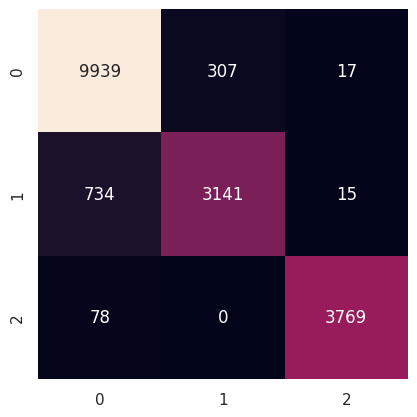

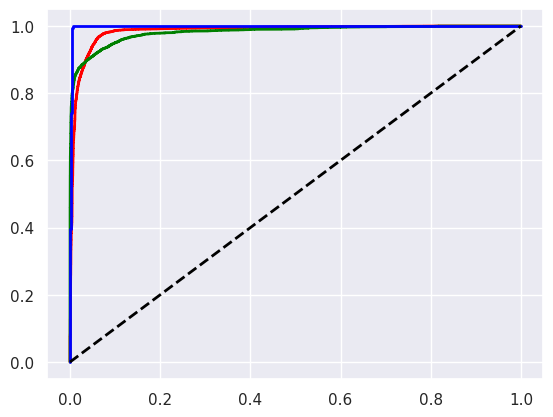

In [5]:
NaiveBayes.evaluate(X_test, y_test)

In [6]:
NaiveBayes.save(new_name='NB_undersampled')